In [1]:
# Importando o Pandas

import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #Definindo comportamento do Pandas

In [2]:
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
# Substituindo a variável categórica por numérica
arquivo['color'] = arquivo['color'].replace('red', 0)
arquivo['color'] = arquivo['color'].replace('white', 1)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
# Definindo o limiar para corte de vinhos bons como os de qualidade >=7
import numpy as np
arquivo['worst'] = np.where(arquivo['quality'] < 7, 1, 0)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


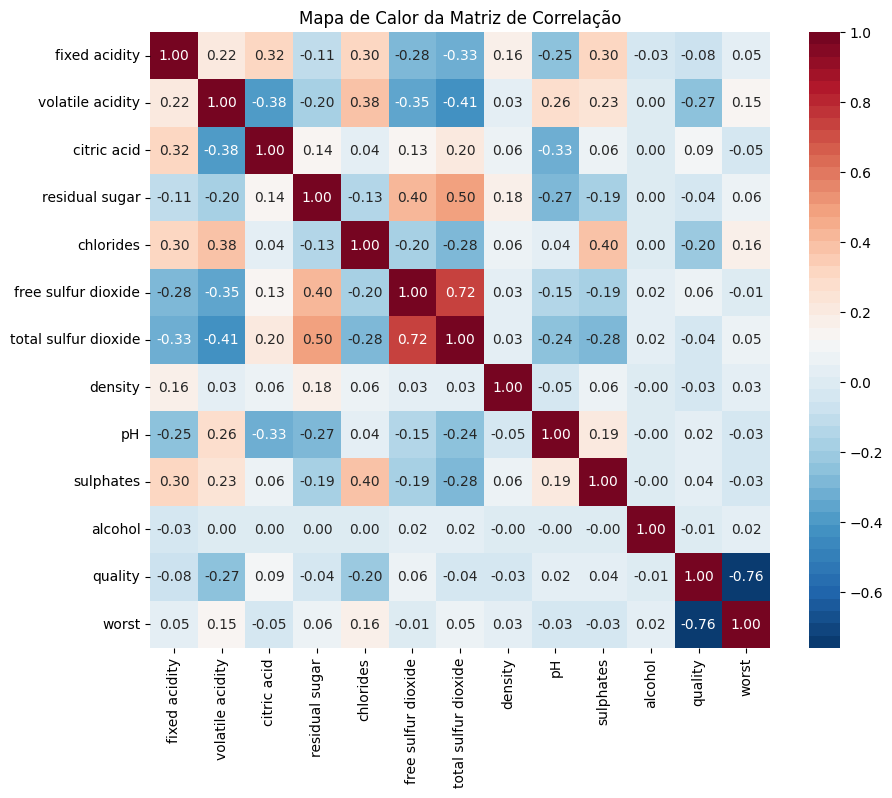

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação para as colunas numéricas do DataFrame
corr = arquivo.select_dtypes('number').corr()

# Personalizar a paleta de cores (opcional)
custom_palette = sns.color_palette("RdBu_r", n_colors=50)

# Plotar o mapa de calor usando o Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=custom_palette, fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

In [6]:
# Calcular a matriz de correlação
correlation_matrix = arquivo.corr()

# Selecionar as correlações com a variável alvo ('quality')
correlation_with_target = correlation_matrix['worst']

# Excluir a correlação da variável alvo consigo mesma
correlation_with_target = correlation_with_target.drop('worst')

# Exibir os valores de correlação e nomes das variáveis preditoras
#print("Correlação com a variável alvo (worst):\n")
#print(correlation_with_target)

# Ordenar os valores de correlação em ordem decrescente
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Exibir os valores de correlação e nomes das variáveis preditoras ordenados
print("Correlação com a variável alvo (worst) - Ordenado:\n")
print(correlation_with_target_sorted)

Correlação com a variável alvo (worst) - Ordenado:

chlorides               0.161781
volatile acidity        0.151714
residual sugar          0.063992
total sulfur dioxide    0.051226
fixed acidity           0.049447
density                 0.025493
alcohol                 0.017769
free sulfur dioxide    -0.014767
pH                     -0.028149
sulphates              -0.033971
citric acid            -0.054444
color                  -0.087479
quality                -0.759360
Name: worst, dtype: float64


In [7]:
#arquivo = arquivo.drop(['alcohol', free sulfur dioxide', total sulfur dioxide'], axis=1) # Teste removendo várias colunas com baixa correlação

arquivo = arquivo.drop(['quality'], axis=1) #Removendo a coluna 'quality' para não interferir nos cálculos do modelo para predição da variável dependente 'worst'

arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [8]:
# Exibir o percentual de cada classe
print(arquivo['worst'].value_counts(normalize=True) * 100)

worst
1    80.344775
0    19.655225
Name: proportion, dtype: float64


In [9]:
# Definindo os atributos da função de aprendizagem
y = arquivo['worst']
X = arquivo.drop('worst',axis = 1)

In [10]:
from sklearn.model_selection import train_test_split

# Definindo os conjuntos de treino e teste, onde x é o conjunto de atributos (features que são nossas variáveis preditoras) e y é a variável alvo.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=55)

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

#Otimização dos Hiperparâmetros para o Modelo
modelo = ExtraTreesClassifier(n_estimators=40, max_depth=20, min_samples_leaf=1, min_samples_split=2, max_features="sqrt", class_weight="balanced", random_state=42)

#Treinamento e Predição
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

In [12]:
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.8783216783216783


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[ 209   84]
 [  90 1047]]


In [14]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       293
           1       0.93      0.92      0.92      1137

    accuracy                           0.88      1430
   macro avg       0.81      0.82      0.81      1430
weighted avg       0.88      0.88      0.88      1430



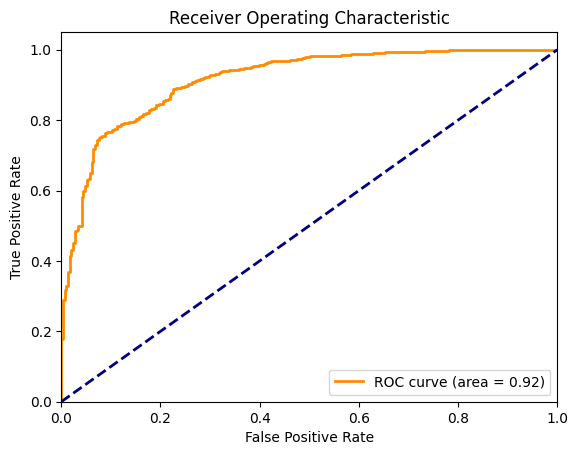

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from joblib import dump

# Salvar o modelo em um arquivo .pkl
dump(modelo, 'modelo.pkl')

['modelo.pkl']

In [ ]:
from google.colab import files
files.download('modelo.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
# Selecionar amostras onde a variável worst é igual a 1 (vinho ruim)
ruins = arquivo.query('worst == 1')

# Selecionar amostras onde a variável worst é igual a 0 (vinho bom)
bons = arquivo.query('worst == 0')


In [ ]:
bons.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,1,0
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,1,0
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1,0
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1,0
21,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.9912,3.17,0.35,11.0,1,0


In [ ]:
ruins.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [ ]:
json = bons.to_json(orient='records')

In [ ]:
print("\nJSON")
print(json)


JSON
[{"fixed acidity":6.6,"volatile acidity":0.16,"citric acid":0.4,"residual sugar":1.5,"chlorides":0.044,"free sulfur dioxide":48.0,"total sulfur dioxide":143.0,"density":0.9912,"pH":3.54,"sulphates":0.52,"alcohol":12.4,"color":1,"worst":0},{"fixed acidity":6.6,"volatile acidity":0.17,"citric acid":0.38,"residual sugar":1.5,"chlorides":0.032,"free sulfur dioxide":28.0,"total sulfur dioxide":112.0,"density":0.9914,"pH":3.25,"sulphates":0.55,"alcohol":11.4,"color":1,"worst":0},{"fixed acidity":6.2,"volatile acidity":0.66,"citric acid":0.48,"residual sugar":1.2,"chlorides":0.029,"free sulfur dioxide":29.0,"total sulfur dioxide":75.0,"density":0.9892,"pH":3.33,"sulphates":0.39,"alcohol":12.8,"color":1,"worst":0},{"fixed acidity":6.2,"volatile acidity":0.66,"citric acid":0.48,"residual sugar":1.2,"chlorides":0.029,"free sulfur dioxide":29.0,"total sulfur dioxide":75.0,"density":0.9892,"pH":3.33,"sulphates":0.39,"alcohol":12.8,"color":1,"worst":0},{"fixed acidity":6.4,"volatile acidity":